# 10 MAIN TBI

## Notebook setup

In [1]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import warnings, scipy.sparse as sp, matplotlib, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import rc_context
from collections import Counter
import matplotlib.font_manager
import openpyxl
import pyreadr
import rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
#import magic
#import seaborn as sns
import palantir
import loompy
import feather
import re
#from scipy.sparse import csgraph

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rc('font', size=14)
import matplotlib.lines as lines

pd.set_option('display.max_rows', 200)

sc.set_figure_params(dpi=80, dpi_save=300, color_map='Spectral_r', vector_friendly=True, transparent=True)
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
/Users/akousa/opt/anaconda3/envs/KousaJahnZhao_et_al_2023/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.2 scipy==1.5.3 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [2]:
user_defined_palette =  [ '#F6222E', '#FEAF16','#3283FE','#BDCDFF', '#3B00FB', '#F8A19F', '#1CFFCE',  '#C4451C', 
                          '#2ED9FF', '#c1c119', '#8b0000', '#FE00FA', '#1CBE4F','#B5EFB5', '#0e452b', '#AA0DFE']

In [3]:
user_defined_cmap_markers = LinearSegmentedColormap.from_list('mycmap', ["#E6E6FF", "#CCCCFF", "#B2B2FF", "#9999FF",  "#6666FF",   "#3333FF", "#0000FF"])
user_defined_cmap_degs = LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#3333FF", "#6666FF", "#9999FF", "#B2B2FF", "#CCCCFF", "#E6E6FF", "#E6FFE6", "#CCFFCC", "#B2FFB2", "#99FF99", "#66FF66", "#33FF33", "#00FF00"])

In [4]:
%matplotlib inline 

## Load data for Fig. 3

### Steady state

In [5]:
path_to_h5ad = '../output/anndata_io/Fig1pt1_annotated.h5ad'

In [6]:
adata_d0 = sc.read_h5ad(path_to_h5ad)
adata_d0.uns['log1p']["base"] = None

### Damage

In [7]:
path_to_h5ad = '../output/anndata_io/figS13_annotated.h5ad'

In [8]:
adata_d147 = sc.read_h5ad(path_to_h5ad)
adata_d147.uns['log1p']["base"] = None

### Combined

In [9]:
path_to_h5ad = '../output/anndata_io/Fig5.h5ad'

In [10]:
adata_d0147 = sc.read_h5ad(path_to_h5ad)
adata_d0147.uns['log1p']["base"] = None

### Transfer annotation

In [11]:
annotated_subsets = pd.concat([adata_d0.obs['cell_type_subset'], adata_d147.obs['cell_type_subset']])

In [12]:
adata_d0147.obs['cell_type_subset']=''

In [13]:
adata_d0147.obs['cell_type_subset'][adata_d0147.obs.index.isin(annotated_subsets.index) == True] = annotated_subsets

/var/folders/yr/0_lgn5q107n7hthkgy5vt7p40000gq/T/ipykernel_20980/2543044282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_d0147.obs['cell_type_subset'][adata_d0147.obs.index.isin(annotated_subsets.index) == True] = annotated_subsets


In [14]:
adata_d0147.uns['cell_type_subset_colors'] = ['#F6222E', '#3283FE', '#16FF32',  '#BDCDFF', '#AA0DFE','#1CFFCE', '#d62728', '#19c9b3','#FFA5D2',   'grey', '#2ED9FF', '#c1c119', '#8b0000', '#3B00FB', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7','#FEAF16', '#325A9B', '#C075A6']

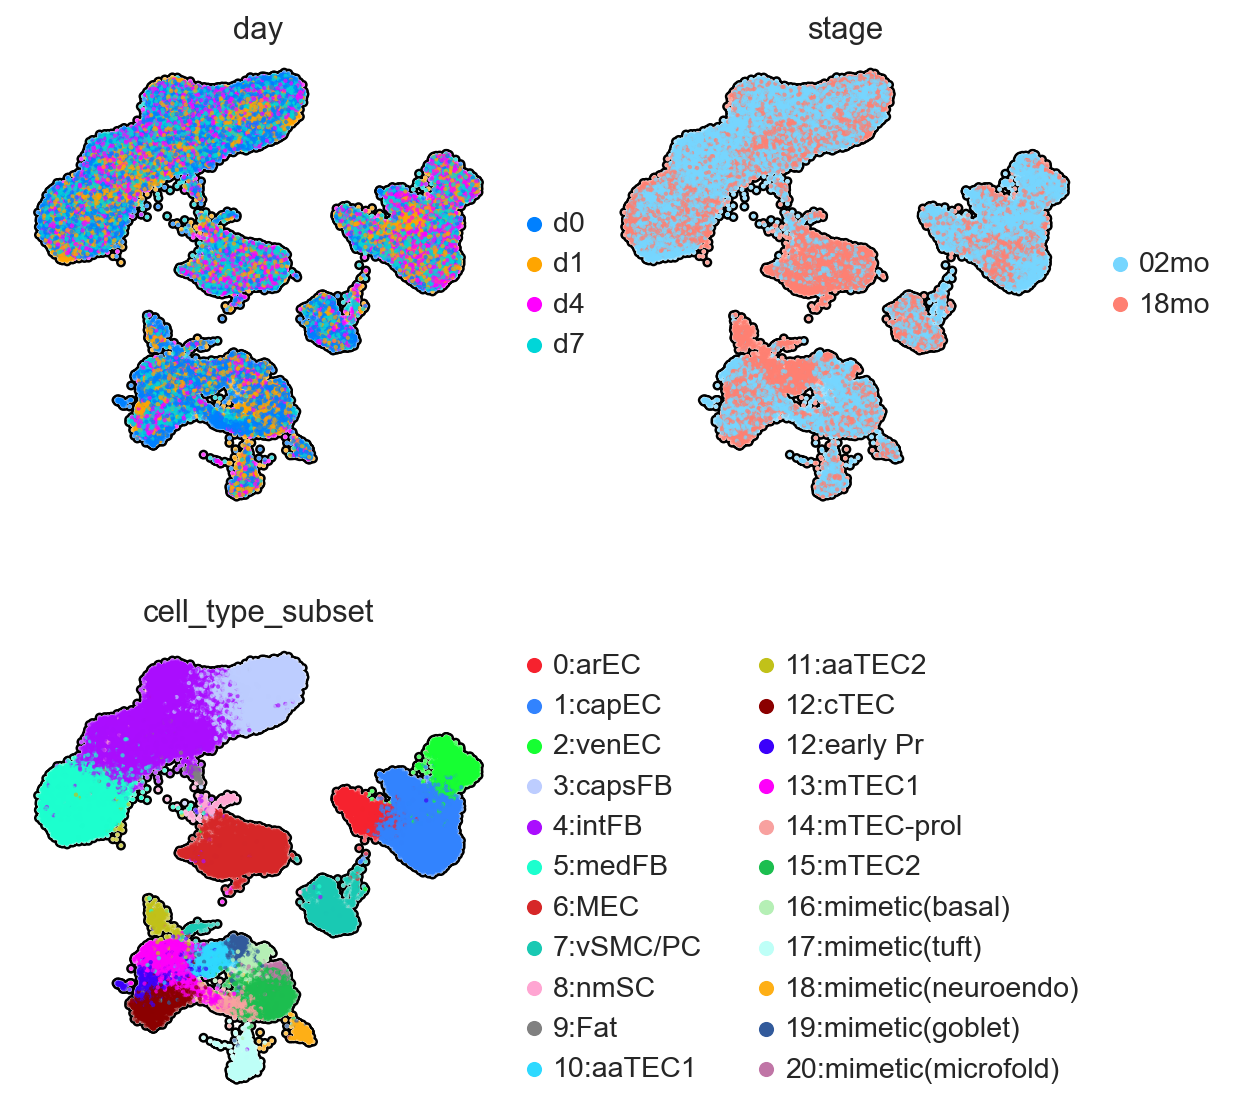

In [15]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)

sc.pl.umap(adata_d0147, color=['day', 'stage', 'cell_type_subset'], 
                     color_map='Spectral_r',
                     use_raw=False, 
                     ncols=2, 
                     wspace = 0.1,
                     outline_width=[0.6, 0.05], 
                     size=15,  
                     frameon=False, 
                     add_outline=True, 
                     sort_order = False,
)

In [ ]:
path_to_h5ad = '../output/anndata_io/Fig5_annotated.h5ad'

In [ ]:
adata_d0147.write(path_to_h5ad)

In [ ]:
adata_d0147 = sc.read_h5ad(path_to_h5ad)
adata_d0147.uns['log1p']["base"] = None

### Proportions over time within stage

In [16]:
TEC_d0147 = adata_d0147[(adata_d0147.obs['cell_type_subset']=='10:aaTEC1') | (adata_d0147.obs['cell_type_subset']=='11:aaTEC2') | (adata_d0147.obs['cell_type_subset']=='12:cTEC') | (adata_d0147.obs['cell_type_subset']=='12:early Pr') |
                        (adata_d0147.obs['cell_type_subset']=='13:mTEC1') | (adata_d0147.obs['cell_type_subset']=='14:mTEC-prol') | (adata_d0147.obs['cell_type_subset']=='15:mTEC2') |
                        (adata_d0147.obs['cell_type_subset']=='16:mimetic(basal)') | (adata_d0147.obs['cell_type_subset']=='17:mimetic(tuft)') | (adata_d0147.obs['cell_type_subset']=='18:mimetic(neuroendo)') |
                        (adata_d0147.obs['cell_type_subset']=='19:mimetic(goblet)') | (adata_d0147.obs['cell_type_subset']=='20:mimetic(microfold)')]

In [17]:
# Remove columns with all 0s
sc.pp.filter_genes(TEC_d0147, min_cells=1)

filtered out 738 genes that are detected in less than 1 cells


#### Identify highly variable genes (all samples but day 1) and replot the data

In [18]:
TEC_d047 = TEC_d0147[TEC_d0147.obs['day']!='d1']

In [19]:
# Remove genes that are not expressed in any cells (remove columns with all 0s)
sc.pp.filter_genes(TEC_d047, min_cells=1)

filtered out 631 genes that are detected in less than 1 cells


In [20]:
sc.pp.highly_variable_genes(TEC_d047, n_top_genes=3500, flavor='seurat')

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [21]:
hvgs = TEC_d047.var[TEC_d047.var['highly_variable']==True].index

In [22]:
TEC_d047.var['highly_variable'] = ''

In [23]:
TEC_d0147.var['highly_variable'] = [True if x in hvgs else False for x in TEC_d0147.var['highly_variable'].index]

In [24]:
rng = np.random.RandomState(42)
sc.tl.pca(TEC_d0147, n_comps=55, svd_solver='arpack', random_state=rng, use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=55
    finished (0:00:01)


In [25]:
sce.pp.harmony_integrate(TEC_d0147, 'sample')

2024-04-08 16:43:37,240 - harmonypy - INFO - Iteration 1 of 10
2024-04-08 16:43:40,049 - harmonypy - INFO - Iteration 2 of 10
2024-04-08 16:43:42,672 - harmonypy - INFO - Iteration 3 of 10
2024-04-08 16:43:45,339 - harmonypy - INFO - Iteration 4 of 10
2024-04-08 16:43:48,148 - harmonypy - INFO - Converged after 4 iterations


In [26]:
sc.pp.neighbors(TEC_d0147, n_neighbors=15, use_rep='X_pca_harmony')
sc.tl.umap(TEC_d0147)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


In [27]:
TEC_d0147.uns['cell_type_subset_colors'] = [ '#2ED9FF', '#c1c119',  '#8b0000','#3B00FB', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5',  '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6']

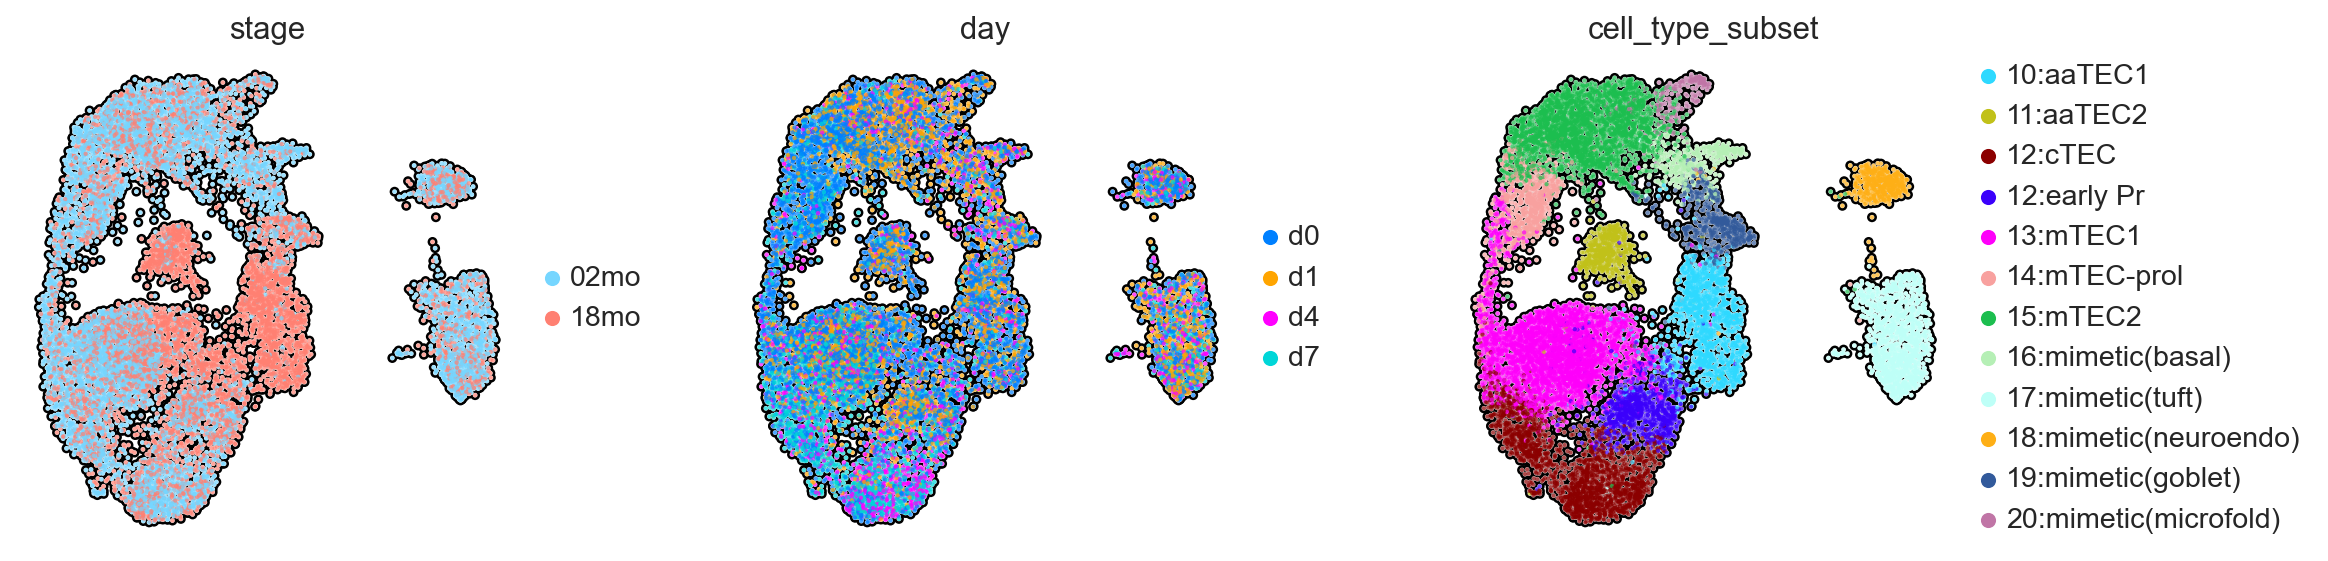

In [28]:
#55
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)

sc.pl.umap(
    TEC_d0147, 
    color=['stage', 'day', 'cell_type_subset'], 
    ncols=6,
    outline_width=[0.6, 0.05],
    size=15,
    frameon=False,
    cmap='Spectral_r',
    wspace = 0.3,
    add_outline=True
)

In [29]:
TEC_d0147.obs['distinct'] = ''
TEC_d0147.obs['distinct'] = TEC_d0147.obs[['stage', 'day']].agg(' '.join, axis=1)

In [30]:
TEC_d0147_2mo = TEC_d0147[TEC_d0147.obs['stage']=='02mo']

In [31]:
crosstb = pd.crosstab(TEC_d0147_2mo.obs['day'], TEC_d0147_2mo.obs['cell_type_subset'], normalize='index')
# new NEW annotation 
user_defined_palette =  ['#2ED9FF', '#c1c119', '#8b0000', '#3B00FB', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6', 'black']

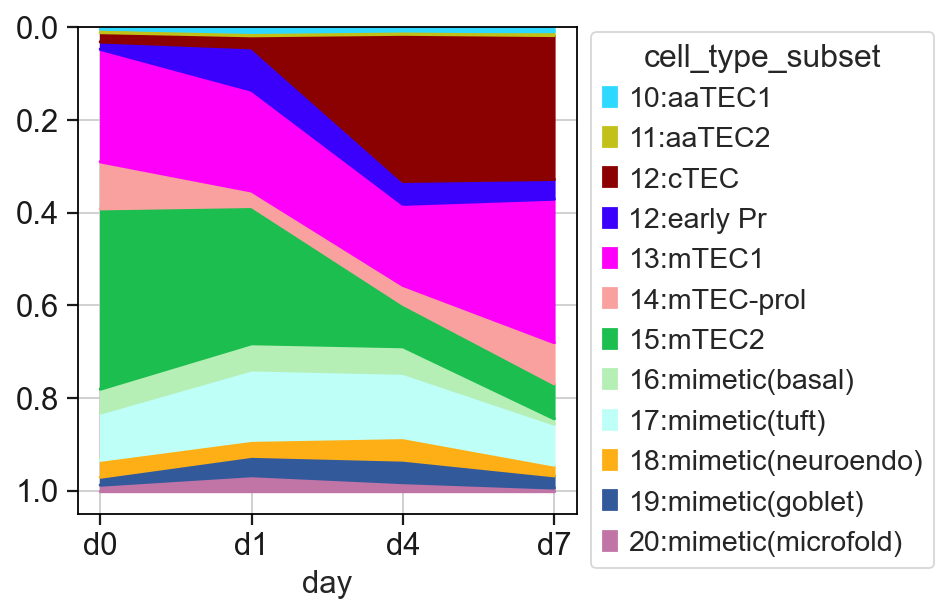

In [32]:
ax = crosstb.plot(kind="area", stacked=True, color=user_defined_palette)
ax.invert_yaxis()
ax.legend(title='cell_type_subset', bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.savefig('figures/areaplot_02mo.pdf')

In [33]:
TEC_d0147_18mo = TEC_d0147[TEC_d0147.obs['stage']=='18mo']

In [34]:
crosstb = pd.crosstab(TEC_d0147_18mo.obs['day'], TEC_d0147_18mo.obs['cell_type_subset'], normalize='index')
# new NEW annotation 
user_defined_palette =  ['#2ED9FF', '#c1c119', '#8b0000', '#3B00FB', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' , '#FEAF16', '#325A9B', '#C075A6', 'black']

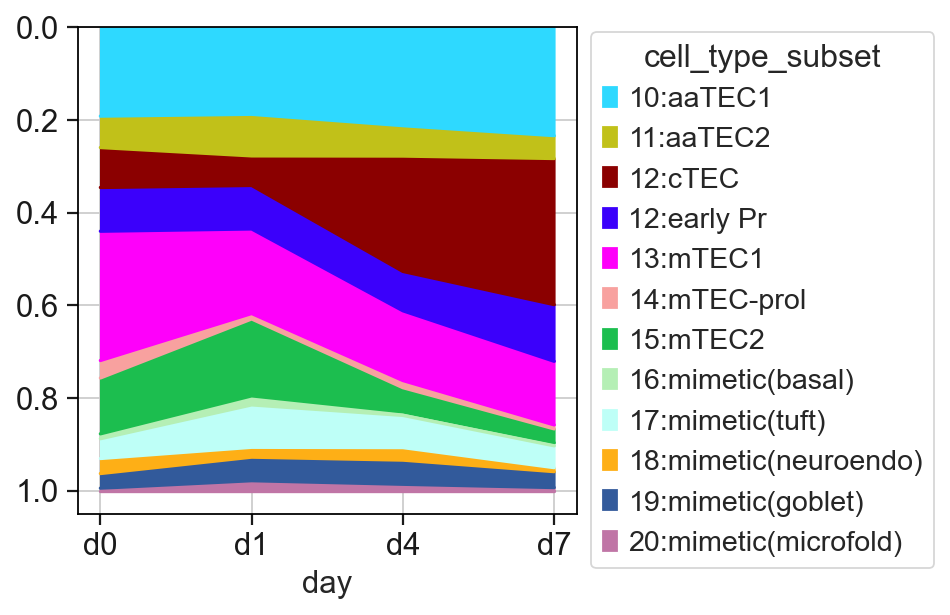

In [35]:
ax = crosstb.plot(kind="area", stacked=True, color=user_defined_palette)
ax.invert_yaxis()
ax.legend(title='cell_type_subset', bbox_to_anchor=(1, 1.02), loc='upper left')
#plt.savefig('figures/areaplot_18mo.pdf')

## Save h5ad files for CellChat

In [ ]:
stage = ['02mo', '18mo']
day = ['d0', 'd1', 'd4', 'd7']
for x in stage:
    for y in day:
            dataset = adata_d0147[(adata_d0147.obs['stage'] == x) & (adata_d0147.obs['day'] == y)]
            path_to_h5ad = '../output/metadata/cellchat_io/cd45neg_0147_SLTBI_vdb_'+x+'_'+y+'_NEW.h5ad'
            dataset.write(path_to_h5ad)

In [ ]:
adata_d0147_light = adata_d0147[(adata_d0147.obs['cell_type_subset']!='6:MEC') & (adata_d0147.obs['cell_type_subset']!='7:vSMC/PC') & (adata_d0147.obs['cell_type_subset']!='8:nmSC') & (adata_d0147.obs['cell_type_subset']!='9:Fat')]

In [ ]:
stage = ['02mo', '18mo']
day = ['d0', 'd1', 'd4', 'd7']
for x in stage:
    for y in day:
            dataset = adata_d0147_light[(adata_d0147_light.obs['stage'] == x) & (adata_d0147_light.obs['day'] == y)]
            path_to_h5ad = '../output/metadata/cellchat_io/cd45neg_0147_SLTBI_vdb_'+x+'_'+y+'_NEW-light.h5ad'
            dataset.write(path_to_h5ad)